In [19]:
import mlrose
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score
from textwrap import wrap

In [2]:
# df = pd.read_csv('audit_dataset.csv', header = None)

# df = pd.get_dummies(df)

# df = df.astype(float)

# X = df.iloc[:, 0:-1]
# y = df.iloc[:, -1]
df = pd.read_csv('AP_Analytics.csv', delimiter=',', quotechar='"')

df = pd.get_dummies(df)


X = df.loc[:, df.columns != 'Chance of Admit ']
y = df['Chance of Admit ']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

In [4]:
scaler = MinMaxScaler()

X_train_scaled = X_train
X_test_scaled = X_test

In [5]:
# one_hot = OneHotEncoder(categories='auto')

# y_train_hot = one_hot.fit_transform(y_train.values.reshape(-1, 1)).todense()
# y_test_hot = one_hot.transform(y_test.values.reshape(-1, 1)).todense()
y_train_hot = y_train
y_test_hot = y_test

# Testing Number of Restarts

In [6]:
np.random.seed(8)
restartss = list(range(0, 100, 5))
testError = []
trainError = []
for r in restartss :
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [13], activation ='sigmoid', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 60000, bias = True, is_classifier = True, restarts = r, 
                                 learning_rate = .0001, early_stopping = True)
    nn_model1.fit(X_train_scaled, y_train_hot)
    y_train_pred = nn_model1.predict(X_train_scaled)
    train_error = 1 - accuracy_score(y_train_hot, y_train_pred)
    trainError.append(train_error)
    y_test_pred = nn_model1.predict(X_test_scaled)
    test_error = 1 - accuracy_score(y_test_hot, y_test_pred)
    testError.append(test_error)
    print(r, trainError, test_error)


0 [0.7114285714285714] 0.7266666666666667
5 [0.7114285714285714, 0.2885714285714286] 0.2733333333333333
10 [0.7114285714285714, 0.2885714285714286, 0.7114285714285714] 0.7266666666666667
15 [0.7114285714285714, 0.2885714285714286, 0.7114285714285714, 0.2885714285714286] 0.2733333333333333
20 [0.7114285714285714, 0.2885714285714286, 0.7114285714285714, 0.2885714285714286, 0.2885714285714286] 0.2733333333333333
25 [0.7114285714285714, 0.2885714285714286, 0.7114285714285714, 0.2885714285714286, 0.2885714285714286, 0.2885714285714286] 0.2733333333333333
30 [0.7114285714285714, 0.2885714285714286, 0.7114285714285714, 0.2885714285714286, 0.2885714285714286, 0.2885714285714286, 0.2885714285714286] 0.2733333333333333
35 [0.7114285714285714, 0.2885714285714286, 0.7114285714285714, 0.2885714285714286, 0.2885714285714286, 0.2885714285714286, 0.2885714285714286, 0.2885714285714286] 0.2733333333333333
40 [0.7114285714285714, 0.2885714285714286, 0.7114285714285714, 0.2885714285714286, 0.288571428571

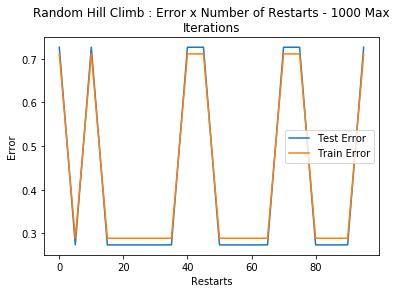

In [7]:
plt.figure()
title = "Random Hill Climb : Error x Number of Restarts - 1000 Max Iterations"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(restartss, testError, '-', label='Test Error')
plt.plot(restartss, trainError, '-', label='Train Error')
plt.legend()
plt.xlabel('Restarts')
plt.ylabel('Error')
filename = 'RHC_MaxIter.png'
plt.savefig("RHC/" + filename)

# Testing Number of Iterations

In [22]:
np.random.seed(4)
restartss = range(int(1),int(15000), 1000)
testError = []
trainError = []
for r in restartss:
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [13], activation ='sigmoid', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = r, bias = True, is_classifier = True, restarts = 40, 
                                 learning_rate = .0001, early_stopping = True)
    nn_model1.fit(X_train_scaled, y_train_hot)
    y_train_pred = nn_model1.predict(X_train_scaled)
    train_error = 1 - accuracy_score(y_train_hot, y_train_pred)
#     trainError.append(train_error)
    y_test_pred = nn_model1.predict(X_test_scaled)
    test_error = 1 - accuracy_score(y_test_hot, y_test_pred)
#     testError.append(test_error)
    trainError.append(mean_squared_error(y_train_hot, y_train_pred))
    testError.append(mean_squared_error(y_test_hot, y_test_pred))
    print(r, test_error)



1 0.72
1001 0.28
2001 0.7266666666666667
3001 0.2733333333333333
4001 0.7266666666666667
5001 0.7266666666666667
6001 0.7266666666666667
7001 0.7266666666666667
8001 0.7266666666666667
9001 0.2733333333333333
10001 0.7266666666666667
11001 0.7266666666666667
12001 0.2733333333333333
13001 0.7266666666666667
14001 0.7266666666666667


[0.72, 0.28, 0.7266666666666667, 0.2733333333333333, 0.7266666666666667, 0.7266666666666667, 0.7266666666666667, 0.7266666666666667, 0.7266666666666667, 0.2733333333333333, 0.7266666666666667, 0.7266666666666667, 0.2733333333333333, 0.7266666666666667, 0.7266666666666667]
range(1, 15000, 1000)
[0.72, 0.28, 0.7266666666666667, 0.2733333333333333, 0.7266666666666667, 0.7266666666666667, 0.7266666666666667, 0.7266666666666667, 0.7266666666666667, 0.2733333333333333, 0.7266666666666667, 0.7266666666666667, 0.2733333333333333, 0.7266666666666667, 0.7266666666666667]


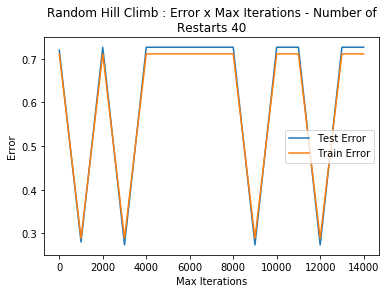

In [23]:
print(testError)
plt.figure()
title = "Random Hill Climb : Error x Max Iterations - Number of Restarts 40"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
print(restartss)
print(testError)
plt.plot(restartss, testError, '-', label='Test Error')
plt.plot(restartss, trainError, '-', label='Train Error')
plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Error')
filename = 'RHC_MaxIter.png'
plt.savefig("RHC/" + filename)

# Runtime 

In [24]:
np.random.seed(4)
time = []
testError = []
trainError = []
print("start")
for i in range(0, 10) :
    start = timer()
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [13], activation ='sigmoid', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 60000, bias = True, is_classifier = True, restarts = 40, 
                                 learning_rate = .0001, early_stopping = True)
    nn_model1.fit(X_train_scaled, y_train_hot)
    y_train_pred = nn_model1.predict(X_train_scaled)
    train_error = 1 - accuracy_score(y_train_hot, y_train_pred)
    trainError.append(train_error)
    y_test_pred = nn_model1.predict(X_test_scaled)
    test_error = 1 - accuracy_score(y_test_hot, y_test_pred)
    testError.append(test_error)
    end = timer()
    time.append(end - start)
    print(i, time[i])
print(time)



start
0 0.6749443849998897
1 0.47969721000026766
2 0.45822563000001537
3 0.6463091599998734
4 0.529356805000134
5 0.4542785720000211
6 0.7445632660001138
7 0.39428456899986486
8 0.40215102899992416
9 0.6417774120000104
[0.6749443849998897, 0.47969721000026766, 0.45822563000001537, 0.6463091599998734, 0.529356805000134, 0.4542785720000211, 0.7445632660001138, 0.39428456899986486, 0.40215102899992416, 0.6417774120000104]


In [25]:
print(sum(time)/len(time))

0.5425588038000114
